In [1]:
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(42)
n_samples = 1000

data = {
    "soil_ph": np.random.uniform(5.0, 7.5, n_samples),  # Soil pH level
    "rainfall": np.random.uniform(500, 1500, n_samples),  # Annual rainfall (mm)
    "temperature": np.random.uniform(15, 35, n_samples),  # Average temperature (°C)
    "fertilizer_usage": np.random.uniform(50, 200, n_samples),  # Fertilizer usage (kg/ha)
    "irrigation": np.random.uniform(100, 500, n_samples),  # Irrigation (mm)
    "crop_type": np.random.choice(["wheat", "corn", "rice"], n_samples),  # Crop type
    "yield": np.zeros(n_samples)  # Placeholder for crop yield (kg/ha)
}

# Simulate crop yield based on the features
for i in range(n_samples):
    data["yield"][i] = (
        1000 * data["soil_ph"][i]  # Higher pH increases yield
        + 0.5 * data["rainfall"][i]  # Moderate rainfall is good
        - 10 * data["temperature"][i]  # High temperature reduces yield
        + 2 * data["fertilizer_usage"][i]  # Fertilizer increases yield
        + 0.1 * data["irrigation"][i]  # Irrigation increases yield
        + np.random.normal(0, 100)  # Add some noise
    )

# Create a DataFrame
df = pd.DataFrame(data)
print(df.head())

    soil_ph     rainfall  temperature  fertilizer_usage  irrigation crop_type  \
0  5.936350   685.132929    20.234114        150.905449  328.798351      rice   
1  7.376786  1041.900947    19.939576        169.502210  422.172932      rice   
2  6.829985  1372.945836    33.125092         87.570185  404.064372      rice   
3  6.496646  1232.224886    19.990924        143.731115  161.559962      corn   
4  5.390047  1306.561148    20.438995        135.761897  159.699788      rice   

         yield  
0  6296.626328  
1  8126.139524  
2  7587.476084  
3  7340.791073  
4  6197.149622  


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode categorical variables
df = pd.get_dummies(df, columns=["crop_type"], drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=["yield"])
y = df["yield"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [4]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 100.88849860158786
R² Score: 0.9692795496372083


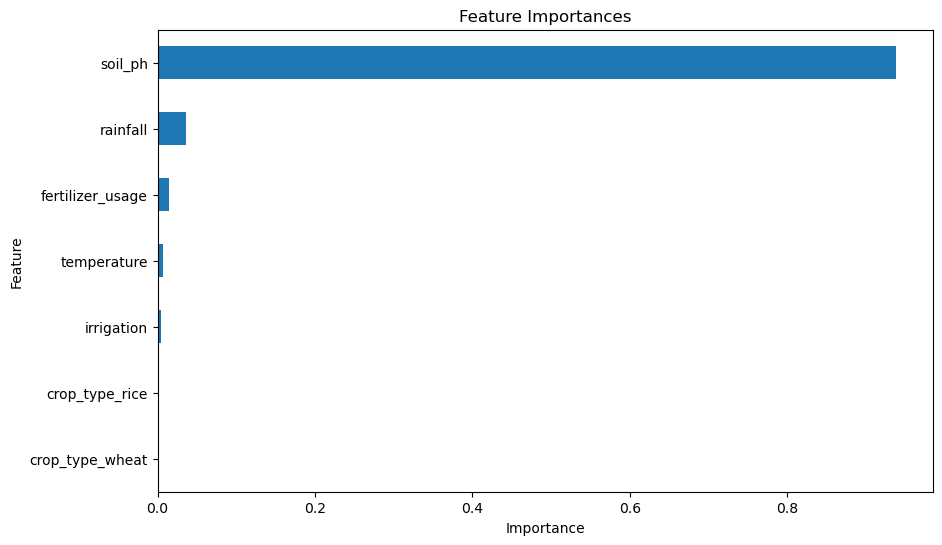

In [5]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind="barh")
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [9]:
from flask import Flask, request, jsonify
import pickle

# Save the model
with open("crop_yield_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Load the model
with open("crop_yield_model.pkl", "rb") as f:
    model = pickle.load(f)

# Create a Flask app
app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    input_data = pd.DataFrame([data])
    input_data = pd.get_dummies(input_data, columns=["crop_type"], drop_first=True)
    input_data = scaler.transform(input_data)
    prediction = model.predict(input_data)
    return jsonify({"predicted_yield": prediction[0]})

if __name__ == "__main__":
    app.run(debug=True)

FileNotFoundError: [Errno 2] No such file or directory: 'crop_yield_model.pkl'

In [ ]:
{
    "soil_ph": 6.5,
    "rainfall": 1200,
    "temperature": 25,
    "fertilizer_usage": 150,
    "irrigation": 300,
    "crop_type": "wheat"
}

In [ ]:
{
    "predicted_yield": 4500.75
}